In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.stats import beta

#data = pd.read_csv('/content/drive/MyDrive/TECI/Rec_systems/2019-Dec.csv')[['event_time', 'event_type', 'product_id','user_id']]


ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
data['event_time'] = pd.to_datetime(data['event_time'],infer_datetime_format=True,utc=False).dt.tz_localize(None)
data['event_type'] = data['event_type'].astype('category')

## Behavior Tables

In [ ]:
df_dict = { i[0]:i[1] for i in  data.groupby('event_type',group_keys=False) }

In [ ]:
df_dict['view']['event_time']

1         2019-12-01 00:00:00
3         2019-12-01 00:00:05
4         2019-12-01 00:00:07
5         2019-12-01 00:00:09
7         2019-12-01 00:00:22
                  ...        
3533281   2019-12-31 23:59:39
3533282   2019-12-31 23:59:46
3533283   2019-12-31 23:59:51
3533284   2019-12-31 23:59:52
3533285   2019-12-31 23:59:57
Name: event_time, Length: 1728331, dtype: datetime64[ns]

(array([189351., 185023., 192067., 211663., 183113., 202015., 155782.,
        176951., 137530.,  94836.]),
 array([737394.        , 737397.09999653, 737400.19999306, 737403.29998958,
        737406.39998611, 737409.49998264, 737412.59997917, 737415.69997569,
        737418.79997222, 737421.89996875, 737424.99996528]),
 <a list of 10 Patch objects>)

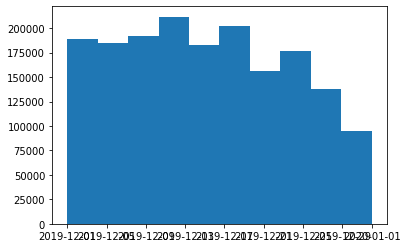

In [ ]:
plt.hist(df_dict['view']['event_time'])

In [ ]:
df_dict['view']['event_time']

1         2019-12-01 00:00:00
3         2019-12-01 00:00:05
4         2019-12-01 00:00:07
5         2019-12-01 00:00:09
7         2019-12-01 00:00:22
                  ...        
3533281   2019-12-31 23:59:39
3533282   2019-12-31 23:59:46
3533283   2019-12-31 23:59:51
3533284   2019-12-31 23:59:52
3533285   2019-12-31 23:59:57
Name: event_time, Length: 1728331, dtype: datetime64[ns]

In [ ]:
timeframes = pd.date_range(start="2019-12", end="2020-01", freq="2H")
tfs = timeframes
timeframes

DatetimeIndex(['2019-12-01 00:00:00', '2019-12-01 02:00:00',
               '2019-12-01 04:00:00', '2019-12-01 06:00:00',
               '2019-12-01 08:00:00', '2019-12-01 10:00:00',
               '2019-12-01 12:00:00', '2019-12-01 14:00:00',
               '2019-12-01 16:00:00', '2019-12-01 18:00:00',
               ...
               '2019-12-31 06:00:00', '2019-12-31 08:00:00',
               '2019-12-31 10:00:00', '2019-12-31 12:00:00',
               '2019-12-31 14:00:00', '2019-12-31 16:00:00',
               '2019-12-31 18:00:00', '2019-12-31 20:00:00',
               '2019-12-31 22:00:00', '2020-01-01 00:00:00'],
              dtype='datetime64[ns]', length=373, freq='2H')

In [ ]:
idxr = lambda df, start, end: df[ (df['event_time'] >= start) & (df['event_time'] < end) ]

idxr(df_dict['cart'], timeframes[0],timeframes[1])

,event_time,event_type,product_id,user_id
2,2019-12-01 00:00:02,cart,4958,494077766
6,2019-12-01 00:00:18,cart,5629988,579966747
9,2019-12-01 00:00:34,cart,5335,494077766
10,2019-12-01 00:00:40,cart,5755170,579751441
12,2019-12-01 00:00:45,cart,5755170,579751441
...,...,...,...,...
3044,2019-12-01 01:58:07,cart,5586024,579993947
3045,2019-12-01 01:58:10,cart,5854899,332844936
3056,2019-12-01 01:59:35,cart,5827009,332844936
3059,2019-12-01 01:59:49,cart,5697328,579993947


## Ad stats

In [ ]:
cart01 = idxr(df_dict['cart'], timeframes[0],timeframes[1])

cart01_counts = cart01.pivot_table(index='product_id',values='user_id',aggfunc='count',).sort_values(by='user_id')
cart01_counts.columns = ['cart_adds']
cart01_counts

,cart_adds
product_id,
3978,1
5839667,1
5839672,1
5840113,1
5842618,1
...,...
5826618,4
5561284,4
5695542,4


In [ ]:
tf01 = {}
for key in df_dict:
  behavior01 = idxr(df_dict[key], timeframes[0],timeframes[10])
  behavior01_counts = behavior01.pivot_table(index='product_id',values='user_id',aggfunc='count',)
  behavior01_counts.columns = [f'n_{key}']
  tf01[key] = behavior01_counts

  display(behavior01_counts)

tf12 = {}
for key in df_dict:
  behavior01 = idxr(df_dict[key], timeframes[10],timeframes[12])
  behavior01_counts = behavior01.pivot_table(index='product_id',values='user_id',aggfunc='count',)
  behavior01_counts.columns = [f'n_{key}']
  tf12[key] = behavior01_counts

  display(behavior01_counts)


,n_cart
product_id,
3762,8
3763,1
3774,3
3806,1
3928,1
...,...
5909241,1
5909243,3
5909244,1


,n_purchase
product_id,
3762,3
3936,2
3959,1
3978,2
4185,3
...,...
5909237,1
5909238,1
5909239,1


,n_remove_from_cart
product_id,
3763,1
3774,4
3806,10
3928,2
3936,2
...,...
5909239,1
5909240,2
5909241,2


,n_view
product_id,
3762,20
3763,23
3774,11
3806,4
3852,1
...,...
5909410,1
5909414,1
5909415,1


,n_cart
product_id,
3762,3
3774,1
3928,2
3936,1
3978,5
...,...
5909238,2
5909240,2
5909244,1


,n_purchase
product_id,
3978,1
4229,2
4497,1
4554,2
4600,3
...,...
5908227,1
5908229,1
5908235,1


,n_remove_from_cart
product_id,
3762,2
3774,2
3928,1
3945,2
3978,3
...,...
5909233,2
5909238,1
5909240,2


,n_view
product_id,
3762,2
3763,4
3774,1
3776,3
3865,2
...,...
5909072,1
5909233,1
5909238,1


In [ ]:
import functools
#base = pd.merge( tf01['cart'], tf01['view']).fillna(0)
stitch_df = lambda df1, df2: pd.merge(df1, df2, left_index=True, right_index=True,how='outer',)

ad_stats01 = functools.reduce(stitch_df, [tf01['view'], tf01['cart'],tf01['purchase'], tf01['remove_from_cart'] ] ).fillna(0)
ad_stats12 = functools.reduce(stitch_df, [tf12['view'], tf12['cart'],tf12['purchase'], tf12['remove_from_cart'] ] ).fillna(0)
ad_stats01

,n_view,n_cart,n_purchase,n_remove_from_cart
product_id,,,,
3762,20.0,8.0,3.0,0.0
3763,23.0,1.0,0.0,1.0
3774,11.0,3.0,0.0,4.0
3806,4.0,1.0,0.0,10.0
3852,1.0,0.0,0.0,0.0
...,...,...,...,...
5909410,1.0,0.0,0.0,0.0
5909414,1.0,0.0,0.0,0.0
5909415,1.0,0.0,0.0,0.0


In [ ]:
added = ad_stats01.add(ad_stats12, fill_value = 0)
added

,n_view,n_cart,n_purchase,n_remove_from_cart
product_id,,,,
3762,22.0,11.0,3.0,2.0
3763,27.0,1.0,0.0,1.0
3774,12.0,4.0,0.0,6.0
3776,3.0,0.0,0.0,0.0
3806,4.0,1.0,0.0,10.0
...,...,...,...,...
5909410,1.0,0.0,0.0,0.0
5909414,1.0,0.0,0.0,0.0
5909415,1.0,0.0,0.0,0.0


In [ ]:
ad_stats01

,n_view,n_cart,n_purchase,n_remove_from_cart
product_id,,,,
3762,20.0,14.0,3.0,0.0
3763,23.0,1.0,0.0,1.0
3774,11.0,5.0,0.0,4.0
3806,4.0,NaN,0.0,10.0
3852,1.0,NaN,0.0,0.0
...,...,...,...,...
5909410,1.0,NaN,0.0,0.0
5909414,1.0,NaN,0.0,0.0
5909415,1.0,NaN,0.0,0.0


In [ ]:
def valid_behavior (df_row): 
  views, carts, purchases, _ = df_row
  return views > carts >= purchases

ad_stats01.apply(valid_behavior, axis=1).value_counts()

True     10466
False     8573
dtype: int64

In [ ]:
ad_stats01 = ad_stats01[ad_stats01.apply(valid_behavior, axis=1)]

In [ ]:
ad_stats01

,n_view,n_cart,n_purchase,n_remove_from_cart
product_id,,,,
3762,20.0,8.0,3.0,0.0
3763,23.0,1.0,0.0,1.0
3774,11.0,3.0,0.0,4.0
3806,4.0,1.0,0.0,10.0
3852,1.0,0.0,0.0,0.0
...,...,...,...,...
5909410,1.0,0.0,0.0,0.0
5909414,1.0,0.0,0.0,0.0
5909415,1.0,0.0,0.0,0.0


In [ ]:
f = lambda n1, n2 : np.random.beta(n2+1 , n1+1 - n2 ) # where n2 is a funnel from n1  

ad_stats01.apply(f,axis=1)

# take the sampled beta value for each row.
# do an argsort on these vals.
# We would usually be working on a much smaller subselection of it (nearby only)

# by right can simply make these np arrays and deal with those for extra performance.

TypeError: ignored

## (Simulated) Bandit Session data
 

### copy pasted and modified

### additional stuff

In [ ]:
bandit_session_stats = pd.DataFrame(columns=['bandit_id','v/i'])

In [ ]:
algo_ids = [0,1,2,]
true_success_rates = [np.random.uniform(0.01,0.4) for _ in algo_ids]

steps = 10000

f_s = np.zeros(shape = (steps, len(algo_ids),2), dtype=np.int8 ) #fed, success

## these are the pseudo-feeds. Need to build MAB set up here......

#for t in range(steps):
  # [ t, algo, f/s ]
#  for algo in algo_ids:
    #np.random.normal()


## Bandit Master


## Stats keeper 
also doubles as session keeper?

NEED TO USE (FEED, Impressions, Applies) data, since we need success (applies) and fails (impressions - applies) for each feed.

Otherwise, origin_feed would need to be added to the job ad (not clean)

instead, by streaming in data to analytics, we can decouple the apply/impression statistic, which also fits more consistently in the `stats_table`

In [ ]:
# design a flow to record analytics of jobs bec probs not gonna be able to do so in time. 

In [ ]:
# https://fastapi.tiangolo.com/tutorial/sql-databases/

In [2]:
# generate sample jsons that would be sent 

def random_uniform_behavior(highest_index = 100):
    n_imps = np.random.randint(5,50)
    imps = np.random.randint(0,highest_index,size=(n_imps))
    n_imps_all_feed = np.random.randint(5,50)
    imps_all_feed = np.random.randint(0,highest_index,size=(n_imps_all_feed))

    return [{'feed':np.random.randint(1,4),
    'impressions': imps, 
    'view': np.random.choice(imps,size=int(np.ceil(n_imps*0.35))), # these are simulated, in production, they will be saved to the main db.
    'save': np.random.choice(imps,size=int(np.ceil(n_imps*0.15))), # in this example, we'll use it to simulate those main db tables too
    'apply': np.random.choice(imps,size=int(np.ceil(n_imps*0.05)))},
    {'feed':0,
    'impressions': imps_all_feed, 
    'view': np.random.choice(imps,size=int(np.ceil(n_imps*0.2))), # these are simulated, in production, they will be saved to the main db.
    'save': np.random.choice(imps,size=int(np.ceil(n_imps*0.1))), # in this example, we'll use it to simulate those main db tables too
    'apply': np.random.choice(imps,size=int(np.ceil(n_imps*0.05))) } ]




In [3]:
simulated_users = [random_uniform_behavior() for _ in range(100)]

NameError: name 'np' is not defined

In [ ]:
simulated_users[:5]

In [ ]:
from collections import defaultdict
impressions = defaultdict(int)
applies = defaultdict(int)
views = defaultdict(int)
saves = defaultdict(int)

feed_imps = defaultdict(int)
feed_apps = defaultdict(int)

for sim_user in simulated_users:
  for job_id in sim_user['impressions']:
    impressions[job_id] += 1

  for job_id in sim_user['apply']:
    applies[job_id] += 1

  for job_id in sim_user['view']:
    views[job_id] += 1

  for job_id in sim_user['save']:
    saves[job_id] += 1

  feed_imps[sim_user['feed']] += len(sim_user['impressions'])
  feed_apps[sim_user['feed']] += len(sim_user['apply'])

### quick benchmarking check

In [ ]:

import time

t0 = time.perf_counter()
#dict method
impressions = defaultdict(int)
applies = defaultdict(int)

feed_imps = defaultdict(int)
feed_apps = defaultdict(int)

for sim_user in simulated_users:
  for job_id in sim_user['impressions']:
    impressions[job_id] += 1

  for job_id in sim_user['apply']:
    applies[job_id] += 1

  feed_imps[sim_user['feed']] += len(sim_user['impressions'])
  feed_apps[sim_user['feed']] += len(sim_user['apply'])

t = time.perf_counter()-t0
print(t)

t0 = time.perf_counter()

##
imp_np = np.zeros((10000))
app_np = np.zeros((10000))
for sim_user in simulated_users:
  imp_np += np.bincount(sim_user['impressions'],minlength=10000)
  app_np += np.bincount(sim_user['apply'],minlength=10000)

t = time.perf_counter()-t0
print(t)

# tested with 10k samples:
#0.13833821200000784 dict iter (winner)
#0.29976889499994286 bincount

0.13833821200000784
0.29976889499994286


### end of benchmarking

In [ ]:
feed_imps

defaultdict(int, {0: 680, 1: 775, 2: 592, 3: 554})

In [ ]:
sim_df = pd.DataFrame([impressions,views,saves,applies]).fillna(0).transpose().sort_index()
sim_df.columns, sim_df.index.name = 'impressions,views,saves,applies'.split(','), 'job_id'

In [ ]:
sim_df

,impressions,views,saves,applies
job_id,,,,
0,23.0,8.0,6.0,1.0
1,21.0,7.0,1.0,1.0
2,27.0,10.0,3.0,1.0
3,22.0,10.0,2.0,0.0
4,26.0,7.0,3.0,2.0
...,...,...,...,...
95,24.0,6.0,4.0,1.0
96,34.0,14.0,2.0,3.0
97,20.0,6.0,3.0,2.0


In [ ]:
impressions[90], applies[90]

(24, 0)

In [ ]:
print(impressions[90], applies[90])

24 0


In [ ]:
%%timeit
#sim_df.add(sim_df.tail(),fill_value=0, axis=0) #both return the same.
sample = sim_df.sample(n=20)
sample.add(sim_df,fill_value=0, axis=0) 


The slowest run took 4.61 times longer than the fastest. This could mean that an intermediate result is being cached.
100 loops, best of 5: 2.01 ms per loop


In [ ]:
%%timeit
s1 = sim_df.sample(n=20)
s2 = sim_df.sample(n=20)

s1.add(s2, fill_value = 0, axis=0)

1000 loops, best of 5: 1.57 ms per loop


## modelling full flow

Note to self: do outside-in planning

Open the existing database file from the previous save

In [ ]:
import sqlite3
local_db = 'analytics.db' # can add timestamp here mayube
local_db_con = sqlite3.connect(local_db)

stats_table_connection = local_db_con
#stats_table_driver = None

stats_df = pd.read_sql('SELECT * FROM stats_table', stats_table_connection)
#where do the feed_imps and feed_apps tallies go?

First, generate data

In [ ]:
simulated_users = [random_uniform_behavior() for _ in range(100)]

In [ ]:
from collections import defaultdict
impressions = defaultdict(int)
applies = defaultdict(int)
views = defaultdict(int)
saves = defaultdict(int)

feed_imps = defaultdict(int)
feed_apps = defaultdict(int)

for sim_user in simulated_users:
  for job_id in sim_user['impressions']:
    impressions[job_id] += 1

  for job_id in sim_user['apply']:
    applies[job_id] += 1

  for job_id in sim_user['view']:
    views[job_id] += 1

  for job_id in sim_user['save']:
    saves[job_id] += 1

  feed_imps[sim_user['feed']] += len(sim_user['impressions'])
  feed_apps[sim_user['feed']] += len(sim_user['apply'])

Then, ingest data into DataFrames

In [ ]:
json_input_df = pd.DataFrame([impressions,views]).fillna(0).transpose().sort_index()
pd.DataFrame([saves,applies]).fillna(0).transpose().sort_index() 

we run the cell below instead of fetching newest saved and applies (which also need to be grouped and counted)

In [ ]:
time_step = time.time() #comment this out later

sim_saves_table_df = pd.DataFrame([saves,]).fillna(0).transpose().sort_index() 
sim_saves_table_df['time'] = time_step
sim_saves_table_df.columns = ['job_id', 'time']

sim_apps_table_df = pd.DataFrame([applies]).fillna(0).transpose().sort_index() 
sim_apps_table_df['time'] = time_step
sim_apps_table_df.columns = ['job_id', 'time']

time_step+=1

open analytics db and write it as a json row

#with open('feed_impressions_and_applies.txt','a') as imps_apps_file:
#  imps_apps_file.write(f"{time_step},{feed_imps[0]},{feed_apps[0]},{feed_imps[1]},{feed_apps[1]},{feed_imps[2]},{feed_apps[2]}\n") # this is inflexible, when we add more feeds it becomes harder


fetching newest saved and applies (which also need to be grouped and counted)

In [ ]:
#should import sqlachemy? need to link to main db
api_db_connection = None # should be an 
last_query_time = time.time() # variable that helps keeps track of which rows have been stored from the bevahior tables on main api

# query behavior tables for rows where time_created > last_query time 

save_table = 'gig_saves'
appl_table = 'gig_applications'
query_template = "SELECT created_at, ad_id FROM dbname.{} WHERE created_at > {}" # this is probably not safe....

new_saves = pd.read_sql_query(query.format(save_table, last_query_time), api_db_connection)
new_apps = pd.read_sql_query(query.format(appl_table, last_query_time), api_db_connection)
# as an alternative, leave these out and add observers to the model itself...

#saves_to_add = new_saves.groupby(['job_id']).agg('count') pivot table syntx is better?
#apps_to_add = new_apps.groupby(['job_id']).agg('count')

saves_to_add = new_saves.pivot_table(index='job_id',aggfunc='count')
apps_to_add = new_apps.pivot_table(index='job_id',aggfunc='count')


#cart01_counts = cart01.pivot_table(index='product_id',values='user_id',aggfunc='count',).sort_values(by='user_id')
#cart01_counts.columns = ['cart_adds']
#cart01_counts

# same for new applies

now update the fresh batch of data by merging DFs and saving into the sqlite db file.

In [ ]:
args = np.array([[1,2,3], [2,3,4]])
args = args+1
print(args)
np.random.beta(*args)

np.random.beta(n_success, n_fails)

# for thompson sampling:
np.random.beta(1+n_success, 1+n_fails)


#np.random.beta(a,b,size=(100,3)) # this works

[[2 3 4]
 [3 4 5]]


array([0.54501439, 0.5801441 , 0.46289599])

In [ ]:
# ALSO NEED TO ADD HIRES.
stats_df['views']
stats_df['saves'].add(saves_to_add, fillvalue=0)
stats_df['applies'].add(apps_to_add, fillvalue=0)
stats_df['impressions'].add(impessions_to_add, fillvalue=0)

stats_df.to_sql('stats_table', stats_table_connection, 
                if_exists = 'replace',
                #dtypes = {col: type}
                ) 

In [ ]:
The stats table is just sortby metrics
the feed_imp[feed_num] is the TS stuff

save feed: V, I stats in csv files. timestamp those files (better to separate so that they dont corrupt eachother)

In [ ]:
# compute derived stats 

# need to take care of div by zero error ??? need to think of edge cases.
stats_df['click/impression'] = stats_df['views']/stats_df['impressions'] #click through rate
stats_df['applies/impression'] = stats_df['applies']/stats_df['impressions'] # application rate
stats_df['hired/applied'] = stats_df['applies']/stats_df['impressions'] # acceptentance rate (don't miss out!)
stats_df['neg_hired/applied'] = -stats_df['hired/applied'] # reverse acceptance rate (be the early bird)

stats_df.replace(np.inf, -1)

In [4]:
import pandas as pd
import numpy as np
a = pd.Series( list(range(10)) )
b = a*2
b = b+1

In [8]:
test = b.div(a,fill_value=-1).replace(np.inf,-1)
test.loc[5] = 30
test.sort_values().index

Int64Index([0, 9, 8, 7, 6, 4, 3, 2, 1, 5], dtype='int64')


SQLite `analytics.db` file persists all the relevant data:
1. stats of all the job ads
2. stats of the feeds 

We also couple it with the H3 proximity api functionality.

## API outline

endpoints:
1. recieve analytics json `POST -> 200`
2. request feed and accompanying stats data. `GET ((verify its main_api), lat,long)  -> 200 `

background routine:
- recieve analytics json (post)
  1. save to folder first
  2. periodically ingest and save the jsons into stats table
  3. (also need to pull the main db data)
- update `bandit_master`
  1. use feed impression and apply counts (should be saved to a file or smth (sqlite again?))
  2. freeze beta distribution state to reduce calls to numpy. just iterate (and repeat) over a precomputed feed list

---
make this api extensible (easy to add extra feeds) since im leaving soon
--> make the querying from main DB very modular

In [1]:
import sqlite3
local_db = 'local.db' # can add timestamp here mayube
local_db_con = sqlite3.connect(local_db)
con = local_db_con
create_query = '''
CREATE TABLE feed_stats(
   ID INTEGER PRIMARY KEY,
   time         TEXT      NOT NULL,
   vals         TEXT      NOT NULL);'''

con.execute(create_query)

In [3]:
import time
#con.execute('drop table feed_stats')

con.execute('insert into feed_stats(time,vals) values (?,?)',('HI'+str(time.time_ns()), '{"hi":1}')).fetchall()
con.execute('select * from feed_stats').fetchall()

[(1, 'HI1625760758.068046', '{"hi":1}'),
 (2, 'HI1625760771373974104', '{"hi":1}')]

In [31]:
con.commit()

import json
query = '''
    SELECT vals 
    FROM  feed_stats
    WHERE ID = (SELECT MAX(ID) FROM feed_stats);'''
latest = con.execute(query).fetchone()
json.loads(latest)

## sandbox

In [ ]:
import sqlite3
con = sqlite3.connect('example.db')

#Once you have a Connection, you can create a Cursor object and call its execute() method to perform SQL commands:

cur = con.cursor()

# Create table
cur.execute('''CREATE TABLE stocks
               (date text, trans text, symbol text, qty real, price real)''')

# Insert a row of data
cur.execute("INSERT INTO stocks VALUES ('2006-01-05','BUY','RHAT',100,35.14)")

# Save (commit) the changes
con.commit()

# We can also close the connection if we are done with it.
# Just be sure any changes have been committed or they will be lost.
con.close()
#The data you’ve saved is persistent and is available in subsequent sessions:

con = sqlite3.connect('example.db')

In [ ]:
con.execute('SELECT * FROM stocks ORDER BY price').fetchall()

pd.read_sql('SELECT * FROM stocks ORDER BY price',con)

,date,trans,symbol,qty,price
0,2006-01-05,BUY,RHAT,100.0,35.14


In [ ]:
df = pd.DataFrame(data=[[0, '10/11/12'], [1, '12/11/10']],
                  columns=['int_column', 'date_column'])
df.to_sql('test_data', con)

In [ ]:
pd.read_sql('SELECT * FROM test_data',con) # this also commits changes

,index,int_column,date_column
0,0,0,10/11/12
1,1,1,12/11/10


In [ ]:
con.close()
con = sqlite3.connect('example.db')
#con.execute('DROP TABLE test_data')

In [19]:
import sqlite3

local_db = sqlite3.connect('analytics.db')
local_db.execute("""SELECT name FROM sqlite_master WHERE type='table' AND name='ad_stats';""").fetchone()
#local_db.execute('''CREATE TABLE stocks
#               (date text, trans text, symbol text, qty real, price real)''')
local_db.execute("""SELECT name FROM sqlite_master WHERE type='table';""").fetchone()[0]


'stocks'

In [21]:
import numpy as np

list(np.array(list(range(10))))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [22]:
{0:'hi'}[0]

'hi'

In [1]:
!pip install fastapi_utils

     |████████████████████████████████| 1.6 MB 7.0 MB/s eta 0:00:01
     |████████████████████████████████| 164 kB 10.9 MB/s eta 0:00:01


In [ ]:
#import importlib
#importlib.reload(test_)

In [1]:
#import test_
from test_ import mutate, p, p2

ModuleNotFoundError: No module named 'test_'

In [2]:
mutate('hi','lol')
mutate('hi2','lol')

In [3]:
p()

TTLCache([('hi', 'lol'), ('hi2', 'lol')], maxsize=10, currsize=2)


In [7]:
import sqlite3 as sl

In [37]:
c = sl.connect('fake_main_behaviors_new.db')

In [45]:
#c.execute("""SELECT name FROM sqlite_master WHERE type='table' AND name='ad_stats';""").fetchall()

c.execute("""SELECT name FROM sqlite_master WHERE type='table';""").fetchall()

[('gig_hires',),
 ('gig_saves',),
 ('gig_applies',),
 ('gig_advertisements',),
 ('feed_stats',)]

In [30]:
curs = c.execute("SELECT * FROM gig_hires")
curs.description

(('user_id', None, None, None, None, None, None),
 ('gig_advertisement_id', None, None, None, None, None, None),
 ('created_at', None, None, None, None, None, None))

In [24]:
c.execute('ALTER TABLE gig_hires RENAME COLUMN employer_id TO gig_advertisement_id;')

In [25]:
curs = c.execute("SELECT * FROM gig_hires")
curs.description

(('user_id', None, None, None, None, None, None),
 ('gig_advertisement_id', None, None, None, None, None, None),
 ('created_at', None, None, None, None, None, None))

In [26]:
c.execute('ALTER TABLE gig_saves RENAME COLUMN employer_id TO gig_advertisement_id;')
c.execute('ALTER TABLE gig_applies RENAME COLUMN employer_id TO gig_advertisement_id;')

In [27]:
c.commit()

In [34]:
c.execute('select MAX(user_id) from gig_hires').fetchone()

(98,)

In [40]:
c.execute('''CREATE TABLE feed_stats
                 (id INTEGER PRIMARY KEY,
                  time INTEGER NOT NULL,
                  vals TEXT NOT NULL)''')


In [41]:
x = c.execute('select * from feed_stats')

In [43]:
x.description

(('id', None, None, None, None, None, None),
 ('time', None, None, None, None, None, None),
 ('vals', None, None, None, None, None, None))